# Basic Pipe Net


We start with the fundamentals of any pipe net: **junctions**, **pipes** and the corresponding **fluid**

In [1]:
from os.path import join
import pandas as pd
import pandapipes as pps

input_dir = r'../net_data_pipe/'
in_junctions = pd.read_csv(join(input_dir, 'example_net-junctions.CSV'))
in_pipes = pd.read_csv(join(input_dir, 'example_net-pipes.CSV'))

in_junctions
in_pipes

hp.pandapower.plotting.plotly.traces - INFO: Failed to import plotly - interactive plotting will not be available


,Name,from_junction,to_junction,length_km
0,l1,0,1,0.20
1,l2,1,2,0.05
2,l3,2,3,0.05
3,l4,3,4,0.05
4,l5,2,5,0.05
5,l6,3,6,0.05
6,l7,0,7,0.05
7,l8,7,8,0.05
8,l9,8,9,0.05
9,l10,7,10,0.10


In [2]:
fluid = 'hgas' # 'lgas', 'hydrogen', 'water'

net = pps.create_empty_network(fluid=fluid)

geodata = in_junctions[['lon', 'lat']].values

pps.create_junctions(net, nr_junctions=31, pn_bar=1, tfluid_k=283.15, height_m=in_junctions['height'], geodata=geodata)
pps.create_pipes_from_parameters(net, in_pipes['from_junction'], in_pipes['to_junction'], length_km=in_pipes['length_km'],
                                 diameter_m = 0.05, k_mm = 0.2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

# Basic Plotting Functions

Two ways to plot a pandapipes net:

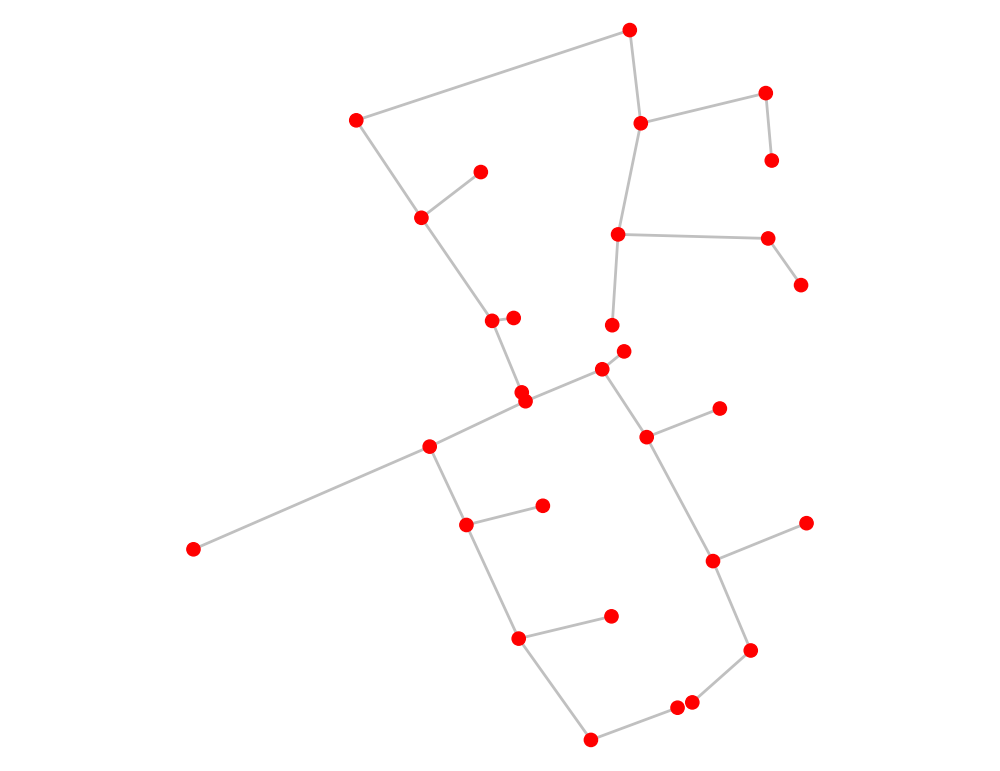

<AxesSubplot: >

In [3]:
from pandapipes.plotting import simple_plot
simple_plot(net)

hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.00392156862745098, 0.45098039215686275, 0.6980392156862745) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (31) to draw! The colors will be repeated to fit.
hp.pandapipes.plotting.collections - WARNING: use_junction_geodata is automatically set to True, since net.pipe_geodata is empty.


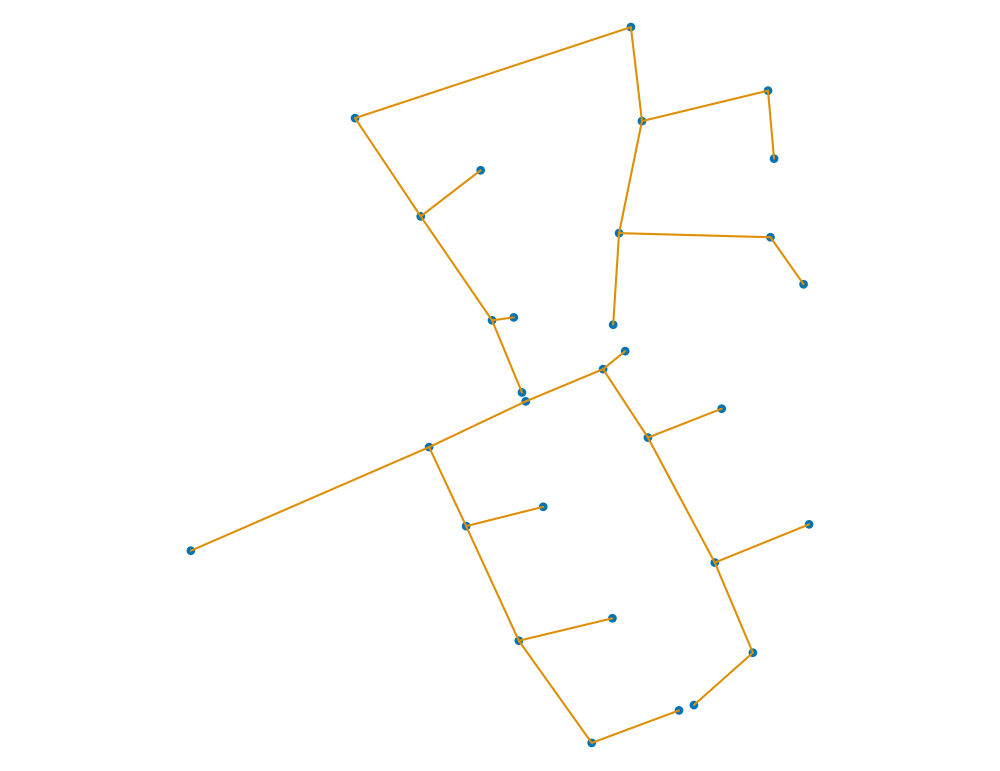

In [4]:
import seaborn as sb
import pandapipes.plotting as plot
import matplotlib.pyplot as plt

colors = sb.color_palette('colorblind')

jc = plot.create_junction_collection(net, color=colors[0])
pc = plot.create_pipe_collection(net, color=colors[1])

collections = [jc, pc]

plot.draw_collections(collections)
plt.show()


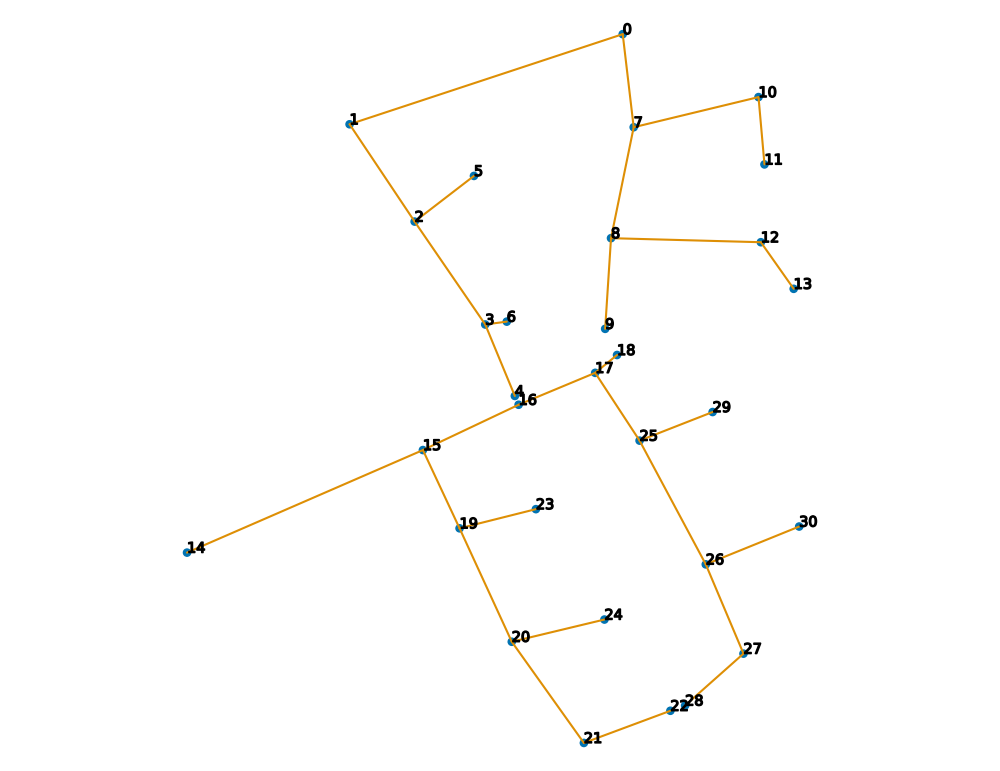

In [5]:
import numpy as np
from pandapower.plotting import create_annotation_collection

coords = net.junction_geodata[['x','y']].values
jic = create_annotation_collection(size=20, texts = np.char.mod('%.0f', net.junction.index), 
                                    coords=coords, zorder=150, color='k')
collections += [jic]
plot.draw_collections(collections)
plt.show()

# Gas Net

Adding **sinks**, **sources** and **ext_grids** to the basic net to perform a pipeflow:

In [6]:
in_sinks = pd.read_csv(join(input_dir, 'example_net-sinks.CSV'))
in_sources = pd.read_csv(join(input_dir, 'example_net-sources.CSV'))

In [7]:
in_sinks
in_sources

,Name,junction,m_dot
0,source1,4,0.0005
1,source2,5,0.0005
2,source3,10,0.0005


In [8]:
pps.create_sinks(net, in_sinks['junction'], in_sinks['m_dot'])
pps.create_sources(net, in_sources['junction'], in_sources['m_dot'])

array([0, 1, 2], dtype=int64)

In [9]:
pps.create_ext_grid(net, junction=0, p_bar=3, t_k=313.15)
pps.create_ext_grid(net, junction=14, p_bar=16, t_k=283.15)

1

In [10]:
pps.pipeflow(net)

In [11]:
net.res_junction.p_bar

0      3.000000
1      2.999850
2      2.999780
3      2.999727
4      2.999693
5      2.999640
6      2.999570
7      2.999685
8      2.999586
9      2.999514
10     2.999520
11     2.999349
12     2.999244
13     2.999145
14    16.000000
15    15.999755
16    15.999737
17    15.999718
18    15.999718
19    15.999737
20    15.999731
21    15.999731
22    15.999731
23    15.999731
24    15.999725
25    15.999700
26    15.999694
27    15.999694
28    15.999694
29    15.999694
30    15.999688
Name: p_bar, dtype: float64

In [12]:
net.res_pipe.v_mean_m_per_s

0     0.196815
1     0.186920
2     0.093462
3    -0.093464
4     0.093464
5     0.186933
6     0.295236
7     0.186939
8     0.000000
9     0.093471
10    0.186955
11    0.186956
12    0.186973
13    0.171272
14    0.085637
15    0.085637
16    0.000000
17    0.085637
18    0.042818
19    0.000000
20    0.000000
21    0.042818
22    0.042818
23    0.085637
24    0.042818
25    0.000000
26    0.000000
27    0.042818
28    0.042818
Name: v_mean_m_per_s, dtype: float64

In [13]:
net.res_junction.t_k

0     313.15
1     283.15
2     283.15
3     283.15
4     283.15
5     283.15
6     283.15
7     283.15
8     283.15
9     283.15
10    283.15
11    283.15
12    283.15
13    283.15
14    283.15
15    283.15
16    283.15
17    283.15
18    283.15
19    283.15
20    283.15
21    283.15
22    283.15
23    283.15
24    283.15
25    283.15
26    283.15
27    283.15
28    283.15
29    283.15
30    283.15
Name: t_k, dtype: float64

# Plot Gas Net

Plotting the new components:

hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.00784313725490196, 0.6196078431372549, 0.45098039215686275) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (8) to draw! The colors will be repeated to fit.
hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.8352941176470589, 0.3686274509803922, 0.0) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (3) to draw! The colors will be repeated to fit.
hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.8, 0.47058823529411764, 0.7372549019607844) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (2) to draw! The colors will be repeated to fit.


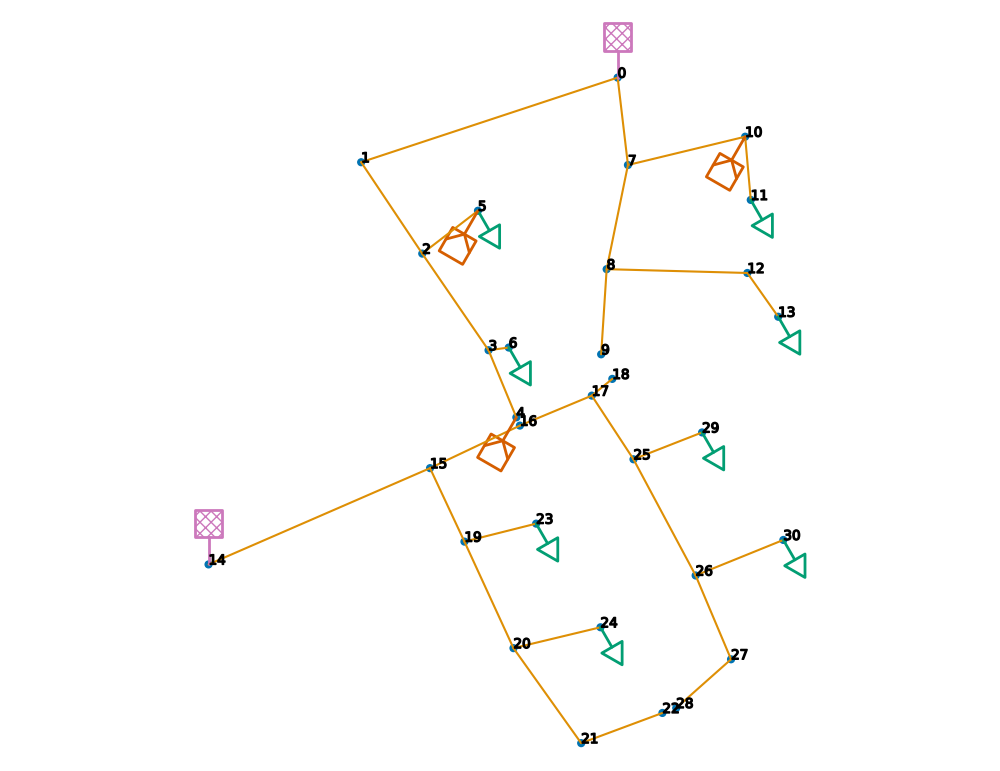

In [14]:
sc = plot.create_sink_collection(net, color=colors[2], size=20)
soc = plot.create_source_collection(net, color=colors[3], size=20)
ec = plot.create_ext_grid_collection(net, color=colors[4], size=20)

collections += [sc, soc, ec]

plot.draw_collections(collections)
plt.show()

# Further Components

To complete the pandapipes component list for gas nets, we also add **valves**, a **pressure_controller** and a **pump**:

In [15]:
pps.create_valves(net, [4, 9, 22], [16, 18, 28], 0.05, opened=False)
pps.create_pressure_control(net, 5, 9, 9, 2.7)
pps.create_pump(net, 9, 6, std_type='P1')

hp.pandapipes.create - INFO: Using a default pressure controller in pandapipes assumes, that the temperature settings at the junctions are kept. Therefore, energy is induced to meet these constraints.


0

In [16]:
pps.pipeflow(net)

PipeflowNotConverged: The hydraulic calculation did not converge to a solution.

In [17]:
net._internal_results

{'iterations': 11,
 'error_p': 0.669677305661989,
 'error_v': 63.56748920970219,
 'residual_norm': 0.3508038871899543}

In [18]:
pps.pipeflow(net, iter=20)

In [19]:
net._internal_results

{'iterations': 18,
 'error_p': 1.9102960510221677e-07,
 'error_v': 1.3212694716712724e-05,
 'residual_norm': 1.356418090361054e-07}

In [20]:
net.res_junction.p_bar

0      3.000000
1      3.363677
2      3.445587
3      3.091130
4      3.091094
5      4.141448
6      2.700150
7      2.897429
8      2.798817
9      2.700000
10     2.897271
11     2.897106
12     2.798499
13     2.798405
14    16.000000
15    15.999755
16    15.999737
17    15.999718
18    15.999718
19    15.999737
20    15.999731
21    15.999731
22    15.999731
23    15.999731
24    15.999725
25    15.999700
26    15.999694
27    15.999694
28    15.999694
29    15.999694
30    15.999688
Name: p_bar, dtype: float64

In [21]:
net.res_valve.v_mean_m_per_s

0   NaN
1   NaN
2   NaN
Name: v_mean_m_per_s, dtype: float64

In [24]:
net.res_pipe.v_mean_m_per_s

0    -15.289443
1    -13.789574
2     29.202631
3     -0.091364
4    -38.592345
5     32.101707
6     16.705645
7     16.185628
8     16.414673
9      0.095937
10     0.191888
11     0.196891
12     0.196910
13     0.171272
14     0.085637
15     0.085637
16     0.000000
17     0.085637
18     0.042818
19     0.000000
20     0.000000
21     0.042818
22     0.042818
23     0.085637
24     0.042818
25     0.000000
26     0.000000
27     0.042818
28     0.042818
Name: v_mean_m_per_s, dtype: float64

In [25]:
pps.create_fluid_from_lib(net, 'hydrogen')

In [26]:
pps.pipeflow(net, iter=20)

In [27]:
net.res_pipe.v_mean_m_per_s

0     -42.174020
1     -38.198527
2      82.282715
3      -0.766521
4    -108.826576
5      90.551387
6      48.702385
7      46.667345
8      46.206870
9       0.801729
10      1.603542
11      1.645327
12      1.645479
13      1.484736
14      0.742412
15      0.742419
16      0.000000
17      0.742412
18      0.371209
19      0.000000
20      0.000000
21      0.371209
22      0.371210
23      0.742425
24      0.371216
25      0.000000
26      0.000000
27      0.371216
28      0.371217
Name: v_mean_m_per_s, dtype: float64

In [28]:
pps.create_fluid_from_lib(net, 'hgas')

In [29]:
data = net.std_types['pump']['P1'].get_pressure(np.linspace(0, 0.05, 20))

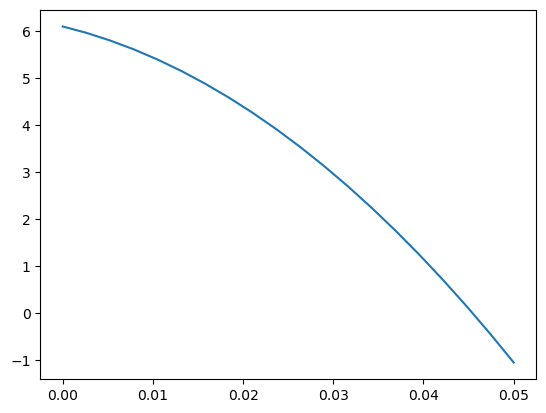

In [30]:
plt.plot(np.linspace(0, 0.05, 20), data)

# Plotting Further Components

Plotting the final gas net:

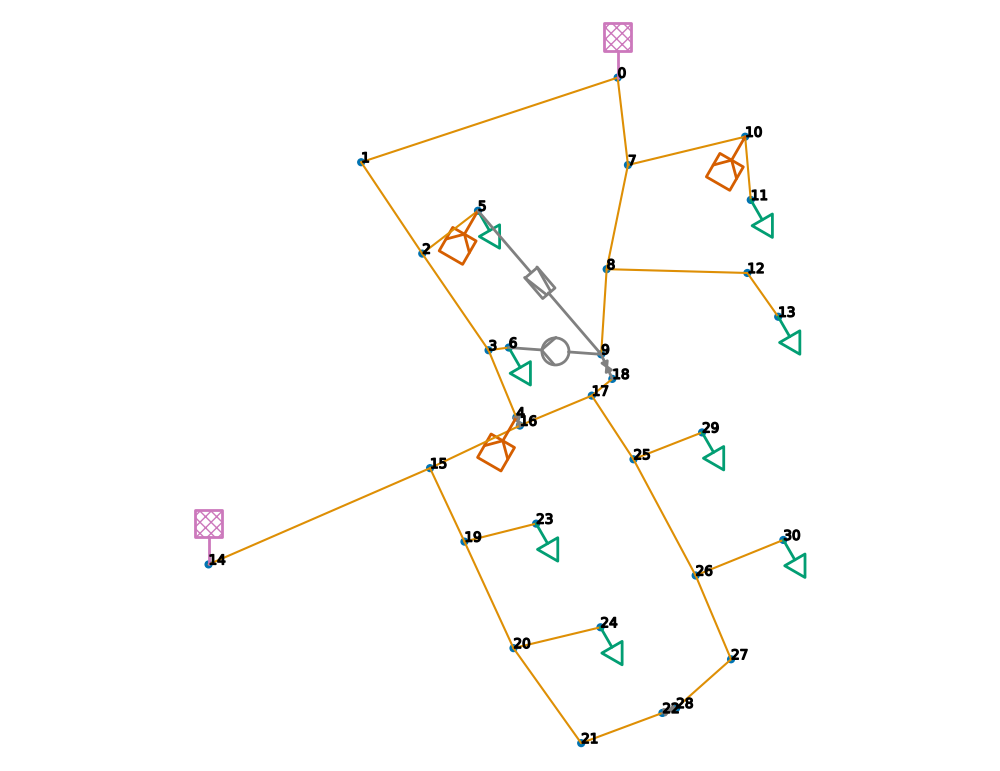

In [31]:
pcc = plot.create_pressure_control_collection(net, size=20, color='grey')
vc = plot.create_valve_collection(net, size=5, color='grey')
pc = plot.create_pump_collection(net, size=20, color='grey')

collections += [pcc, vc, pc]

plot.draw_collections(collections)
plt.show()

In [ ]:
pps.to_json(net, 'net.json')